In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_column', None)

sample_submission = pd.read_csv('./sample_submission.csv')
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
data = pd.concat([test, train])

# Context

Plan:
- Data Quality assessment
   - The first look on the data
   - Variables and their values, types (uni-variate analysis)
- Data exploration
   - Feature engineering
   - Filling Missing Values
   - Survival rate
- Summary

In [2]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C
...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,3,"Cash, Cheryle",female,27.0,0,0,7686,10.12,NaN,Q
99996,199996,1,"Brown, Howard",male,59.0,1,0,13004,68.31,NaN,S
99997,199997,3,"Lightfoot, Cameron",male,47.0,0,0,4383317,10.87,NaN,S
99998,199998,1,"Jacobsen, Margaret",female,49.0,1,2,PC 26988,29.68,B20828,C


# Data quality assessment

## The first look on the data

We can see that
 - both `test` and `train` datasets have the same rows, i.e. 100000 rows;
 - both `test` and `train` datasets does not have any duplicated rows;
 - there are 12 columns in the the `test` dataset and 11 columns in the `train` dataset;
 - the variable `Survived` is in the `train` dataset and is not in the `test` dataset;
 - the number of missing values in the `train` dataset equals to 76165;
 - the number of missing values in the `test` dataset equals to 79909;
 - the variables with missing values (for both `train` and `test` datasets) are `Age`, `Ticket`, `Fare`, `Cabin` and `Embarked`;

In [3]:
print('Rows and Columns in the train dataset:', train.shape)
print('Rows and Columns in the test dataset:', test.shape, '\n')

print(train.info(), '\n')
print(test.info(), '\n')

print('Missing values in train dataset:', sum(train.isnull().sum()))
print('Missing values in test dataset:', sum(test.isnull().sum()))

print('Have datasets some duplicated rows: ', data.duplicated().any())

Rows and Columns in the train dataset: (100000, 12)
Rows and Columns in the test dataset: (100000, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #  

## Variables and their values, types (uni-variate analysis)

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


### The variable `PassengerId`
 - does not have duplicated values (in both datasets)
 - is a discrete variable

In [5]:
print("Has passengerID in train dataset any duplicated values: ", train['PassengerId'].duplicated().any())
print("Has passengerID in test dataset any duplicated values: ", test['PassengerId'].duplicated().any())

Has passengerID in train dataset any duplicated values:  False
Has passengerID in test dataset any duplicated values:  False


### The variable `Pclass`
As we can see below the variable `Pclass`
 - has values 1, 2 and 3 (the 1st ticket class, the 2nd ticket class, the 3rd ticket class)
 - is a discrete variable
 - has different proportions in the train and test datasets: the 1st ticket class in the train and test datasets are approximately the same; the 2nd ticket class is 30% in the train dataset and 10% in the test dataset; the 3rd ticket class in the train appears 40% and in the test dataset appears 60%.

   Pclass
3   41006
1   30315
2   28679


Text(0, 0.5, 'Amount')

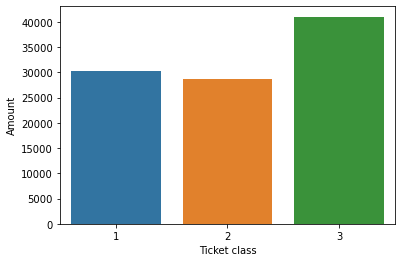

In [6]:
frequency_table = pd.DataFrame(train['Pclass'].value_counts())
print(frequency_table)

# bar chart
sns.barplot(x=frequency_table.index, y=frequency_table['Pclass'])
plt.xlabel("Ticket class")
plt.ylabel("Amount")

# pie chart
# frequency_table['Percentage'] = train['Pclass'].value_counts(normalize=True).mul(100)
# frequency_table['Percentage'].plot.pie(subplots=True, figsize=(9, 5))
# frequency_table = frequency_table.drop('Percentage', 1)

<AxesSubplot:ylabel='Pclass'>

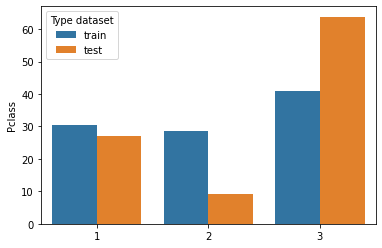

In [7]:
# Comparing distribution of the variable Pclass in the train and test datasets

frequency_table['Type dataset'] = 'train'
test_table = pd.DataFrame(test['Pclass'].value_counts())
test_table['Type dataset'] = 'test'
total_table = pd.concat([frequency_table, test_table], axis=0)
total_table
plt.xlabel('')
plt.ylabel('')

sns.barplot(x=total_table.index, y=total_table['Pclass'] / 1000, zorder=2, hue=total_table['Type dataset'])

### The variable `Name`
As we can see below the variable `Name`
 - is a discrete variable
 - has the type `str`
 - has non-empty strings as values
 - has values consisting of first name and second name (these two parts can be extracted into new features)

In [8]:
print('The type of values of the variable Name: ', type(train['Name'][0]))
print('Is there empty strings as values of the variable Name: ', data[data['Name'].str.len() == 0].size > 1)
print('Do all names have delimiter \', \': ',
      data[data['Name'].str.split(', ').str.len() > 1].index.size == data.index.size)

The type of values of the variable Name:  <class 'str'>
Is there empty strings as values of the variable Name:  False
Do all names have delimiter ', ':  True


### The variable `Sex`
As we can see below the variable `Sex`
 - is a discrete variable
 - has values `male` and `female`
 - has different proportions in the train and test datasets: Males appear 60% of values in the train dataset and 70% in the test dataset; females appear 40% in the train dataset and in test dataset 30% of total dataset.

          Sex
male    56114
female  43886


Text(0, 0.5, 'Amount')

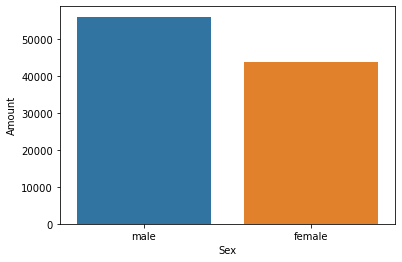

In [9]:
frequency_table = pd.DataFrame(train['Sex'].value_counts())
print(frequency_table)

# bar chart
sns.barplot(x=frequency_table.index, y=frequency_table['Sex'])
plt.xlabel("Sex")
plt.ylabel("Amount")

<AxesSubplot:ylabel='Sex'>

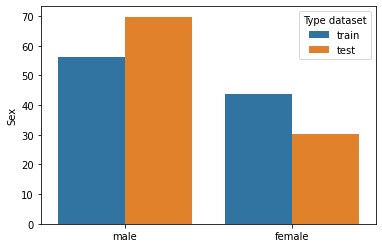

In [10]:
# Comparing distribution of the variable `Sex` in the train and test datasets

frequency_table['Type dataset'] = 'train'
test_table = pd.DataFrame(test['Sex'].value_counts())
test_table['Type dataset'] = 'test'
total_table = pd.concat([frequency_table, test_table], axis=0)
total_table
plt.xlabel('')
plt.ylabel('')

sns.barplot(x=total_table.index, y=total_table['Sex'] / 1000, zorder=2, hue=total_table['Type dataset'])

In [11]:
data['Sex'].value_counts()

male      125871
female     74129
Name: Sex, dtype: int64

### The variable `Age`
As we can see below the variable `Age`
 - is a continuously variable
 - has different distribution between the train and the test datasets

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64


(array([ 7876.,  4041., 16156., 13900., 13654., 15249., 14169.,  9261.,
         2255.,   147.]),
 array([8.0000e-02, 8.7720e+00, 1.7464e+01, 2.6156e+01, 3.4848e+01,
        4.3540e+01, 5.2232e+01, 6.0924e+01, 6.9616e+01, 7.8308e+01,
        8.7000e+01]),
 <BarContainer object of 10 artists>)

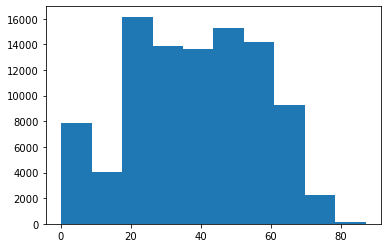

In [12]:
print(train['Age'].describe())
plt.hist(train['Age'])

Text(0, 0.5, '')

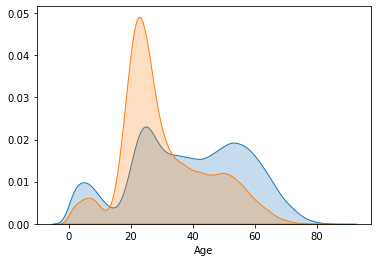

In [13]:
# Comparing distribution of the variable `Age` in the test dataset and the train dataset

distr = sns.kdeplot(x=train['Age'], zorder=2, shade=True)
distr = sns.kdeplot(x=test['Age'], zorder=2, shade=True)
distr.set_xlabel('Age')
distr.set_ylabel('')

### The variable `SibSp`
As we can see below the variable `SibSp`
 - a discrete variable
 - has values 0, 1, 2, 3, 4, 5 and 8
 - passengers without siblings in the train dataset is more by 10% than in the test data
 - passengers with the single sibling in the train dataset is less by 10% than the test data

   SibSp
0  73308
1  19758
2   3703
3   1635
4   1168
8    296
5    132


Text(0, 0.5, 'Amount')

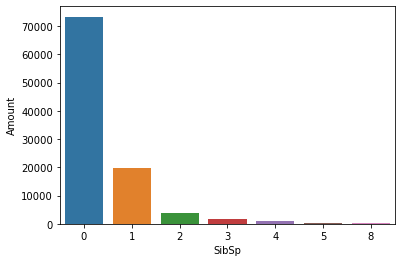

In [14]:
frequency_table = pd.DataFrame(train['SibSp'].value_counts())
print(frequency_table)

# bar chart
sns.barplot(x=frequency_table.index, y=frequency_table['SibSp'])
plt.xlabel("SibSp")
plt.ylabel("Amount")

<AxesSubplot:ylabel='SibSp'>

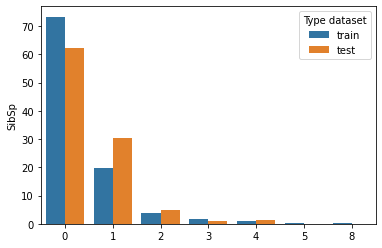

In [15]:
# Comparing distribution of the variable `SibSp` in the train and test datasets

frequency_table['Type dataset'] = 'train'
test_table = pd.DataFrame(test['SibSp'].value_counts())
test_table['Type dataset'] = 'test'
total_table = pd.concat([frequency_table, test_table], axis=0)
total_table
plt.xlabel('')
plt.ylabel('')

sns.barplot(x=total_table.index, y=total_table['SibSp'] / 1000, zorder=2, hue=total_table['Type dataset'])

### The variable `Parch`
As we can see below the variable `Parch`
 - a discrete variable
 - has values 0, 1, 2, 3, 4, 5, 6, 9

   Parch
0  73540
1  12996
2  11236
3    983
4    446
5    331
9    264
6    204


Text(0, 0.5, 'Amount')

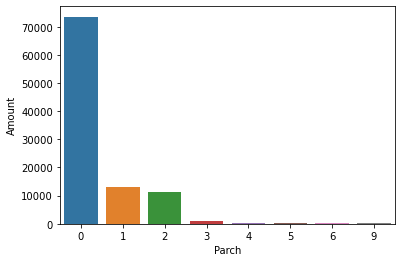

In [16]:
frequency_table = pd.DataFrame(train['Parch'].value_counts())
print(frequency_table)

# bar chart
sns.barplot(x=frequency_table.index, y=frequency_table['Parch'])
plt.xlabel("Parch")
plt.ylabel("Amount")

<AxesSubplot:ylabel='Parch'>

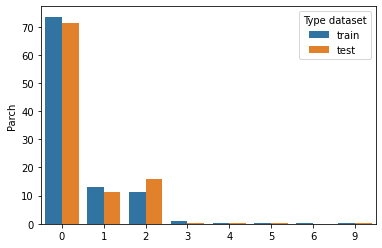

In [17]:
# Comparing distribution of the variable `Parch` in the train and test datasets

frequency_table['Type dataset'] = 'train'
test_table = pd.DataFrame(test['Parch'].value_counts())
test_table['Type dataset'] = 'test'
total_table = pd.concat([frequency_table, test_table], axis=0)
total_table
plt.xlabel('')
plt.ylabel('')

sns.barplot(x=total_table.index, y=total_table['Parch'] / 1000, zorder=2, hue=total_table['Type dataset'])

### The variable `Ticket`
Values of the variable `Ticket` are strings. Some tickets are numeric and another tickets consist of two parts: a letter part and some numeric part. We need partition a ticket number with letter prefix into letter prefix and the numeric part. Tickets with some letters prefix contributes 25% of the total tickets in both `train` and `test` datasets. The variable `Ticket` have duplicated ticket numbers (in both datasets). The column `Ticket` contains empty entries (i.e. without a numeric part of a ticket number)

In [20]:
# print(train['Ticket'].head())
is_prefix = train['Ticket'].apply(lambda x: len(str(x).split(' ')) > 1)
tickets_with_prefix = is_prefix.sum()
print('The number of tickets with a letter prefix in the train dataset = ', tickets_with_prefix)
print('The number of tickets without any letter prefixes in the train dataset = ',
      len(train.index) - tickets_with_prefix)

# print(test['Ticket'].head(10))
is_prefix = test['Ticket'].apply(lambda x: len(str(x).split(' ')) > 1)
tickets_with_prefix = is_prefix.sum()
print('The number of tickets with a letter prefix in the test dataset = ', tickets_with_prefix)
print('The number of tickets without any letter prefixes in the test dataset = ',
      len(train.index) - tickets_with_prefix)

print("Have tickets in train dataset any duplicated values: ", train['Ticket'].duplicated().any())
print("Have tickets in test dataset any duplicated values: ", test['Ticket'].duplicated().any())

print("Have tickets in train dataset empty entries:", train[train['Ticket'] == ''].index.size > 0)
print("Have tickets in test dataset empty entries:", test[test['Ticket'] == ''].index.size > 0)
train['Ticket']
# List of letter prefixes of tickets
train['Ticket'].dropna().apply(lambda e: str(e).split(' ')[0:1][0].replace('.', '').replace('/', '').lower() if len(
    e.split(' ')) > 1 else 'NaN').value_counts()

The number of tickets with a letter prefix in the train dataset =  24655
The number of tickets without any letter prefixes in the train dataset =  75345
The number of tickets with a letter prefix in the test dataset =  25042
The number of tickets without any letter prefixes in the test dataset =  74958
Have tickets in train dataset any duplicated values:  True
Have tickets in test dataset any duplicated values:  True
Have tickets in train dataset empty entries: False
Have tickets in test dataset empty entries: False


NaN        70722
pc          6375
a           3750
ca          2448
a5          1804
scparis     1778
stono       1512
sotonoq      992
wc           711
pp           622
fcc          577
a4           533
scah         525
stono2       416
wep          344
soc          339
fc           296
sotono2      290
c            220
sc           164
ppp          149
sopp         134
scow         101
aq4           73
sca4          71
swpp          69
lp            56
fa            54
as            44
stonoq        38
casoton       37
sop           36
sp            34
sca3          33
aq3           30
Name: Ticket, dtype: int64

### The variable `Fare`
As we can see below the variable `Fare`
 - is a continuously variable
 - has quite the same distribution in the train and test datasets

(array([1.68172e+05, 1.37890e+04, 1.07830e+04, 5.30900e+03, 4.61000e+02,
        4.95000e+02, 4.16000e+02, 2.18000e+02, 6.50000e+01, 2.50000e+01]),
 array([5.00000e-02, 7.45110e+01, 1.48972e+02, 2.23433e+02, 2.97894e+02,
        3.72355e+02, 4.46816e+02, 5.21277e+02, 5.95738e+02, 6.70199e+02,
        7.44660e+02]),
 <BarContainer object of 10 artists>)

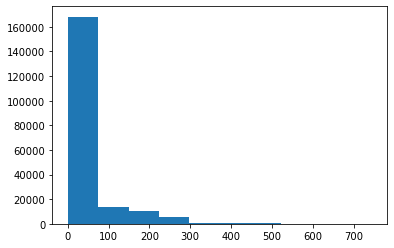

In [21]:
train['Fare'].describe()
plt.hist(data['Fare'])

Text(0, 0.5, '')

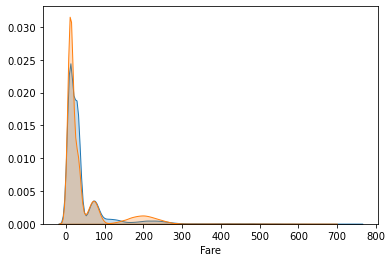

In [22]:
# Comparing distribution of the variable `Fare` in the test dataset and the train dataset

distr = sns.kdeplot(x=train['Fare'], zorder=2, shade=True)
distr = sns.kdeplot(x=test['Fare'], zorder=2, shade=True)
distr.set_xlabel('Fare')
distr.set_ylabel('')

### The variable `Cabin`

As we can see below the variable `Cabin`
 - has duplicated values
 - has values with the first symbol a letter (letters can be extracted into new feature)

In [23]:
print("Has the variable Cabin in train dataset any duplicated values: ", train['Cabin'].dropna().duplicated().any())
print("Has the variable Cabin in test dataset any duplicated values: ", test['Cabin'].dropna().duplicated().any())

Has the variable Cabin in train dataset any duplicated values:  True
Has the variable Cabin in test dataset any duplicated values:  True


### The variable `Embarked`

As we can see below the variable `Embarked`
 - has duplicated values
 - values `S` (Southampton), `C` (Cherbourg) and `Q` (Queenstown)
 - is a discrete variable

In [24]:
data['Embarked'].value_counts()

S    140981
C     44495
Q     13997
Name: Embarked, dtype: int64

# Data exploration

## Feature engineering
- Partition names into first names and second names
- Partition tickets with letter prefixes into letter part and numeric part (if a ticket does not have letter prefixes then we assign a category `n`)
- Partition cabin number into the deck part and the numeric part of the number

## Description new features
- `First name` is a variable with values of the first names of passengers
- `Second name` is a variable with values of the second names of passengers
- `Letter prefixes` is a variable with letter prefixes of numbers of tickets (if the number of a ticket does not have a letter prefix then we assign the value `n`)
- `Ticket` is a variable with numeric parts of ticket numbers
- `Deck` is a variable with values of deck numbers (from cabin numbers) and `N` (if no information about it)
- `Cabin` contains only numerical parts of cabin numbers

In [25]:
train['First name'] = train['Name'].apply(lambda e: str(e).split(', ')[1:2][0])
train['Second name'] = train['Name'].apply(lambda e: str(e).split(', ')[0:1][0])
test['First name'] = test['Name'].apply(lambda e: str(e).split(', ')[1:2][0])
test['Second name'] = test['Name'].apply(lambda e: str(e).split(', ')[0:1][0])

train['Letter prefixes'] = train['Ticket'].apply(
    lambda e: str(e).split(' ')[0:1][0].replace('.', '').replace('/', '').lower() if len(
        str(e).split(' ')) > 1 else 'n')
train['Ticket'] = train['Ticket'].apply(
    lambda e: str(e).split(' ')[-1].replace('.', '').replace('/', '').lower() if len(str(e).split(' ')) > 1 else e)

test['Letter prefixes'] = test['Ticket'].apply(
    lambda e: str(e).split(' ')[0:1][0].replace('.', '').replace('/', '').lower() if len(
        str(e).split(' ')) > 1 else 'n')
test['Ticket'] = test['Ticket'].apply(
    lambda e: str(e).split(' ')[-1].replace('.', '').replace('/', '').lower() if len(str(e).split(' ')) > 1 else e)

train['Deck'] = train['Cabin'].apply(lambda e: 'N' if pd.isna(e) else str(e)[0: 1])
train['Cabin'] = train['Cabin'].apply(lambda e: e if str(e).isnumeric() | pd.isna(e) else str(e)[1:])
test['Deck'] = test['Cabin'].apply(lambda e: 'N' if pd.isna(e) else str(e)[0: 1])
test['Cabin'] = test['Cabin'].apply(lambda e: e if str(e).isnumeric() | pd.isna(e) else str(e)[1:])

test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First name,Second name,Letter prefixes,Deck
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S,Daniel,Holliday,n,N
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S,Lorraine,Nguyen,n,N
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,15315,C,Heather,Harris,n,B
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S,Eric,Larsen,n,N
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,22515,C,Sarah,Cleary,n,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,3,"Cash, Cheryle",female,27.0,0,0,7686,10.12,NaN,Q,Cheryle,Cash,n,N
99996,199996,1,"Brown, Howard",male,59.0,1,0,13004,68.31,NaN,S,Howard,Brown,n,N
99997,199997,3,"Lightfoot, Cameron",male,47.0,0,0,4383317,10.87,NaN,S,Cameron,Lightfoot,n,N
99998,199998,1,"Jacobsen, Margaret",female,49.0,1,2,26988,29.68,20828,C,Margaret,Jacobsen,pc,B


## Uni variate analysis of variables `First name` and `Second name`

Top five first names of passengers: James, John, Robert, Michael, William.

Top five last names of passengers: Smith, Johnson, Williams, Jones, Brown

In [26]:
first_names_train = train.groupby(['First name']).size().sort_values(ascending=False)
print('In the train dataset: \n', first_names_train.head())

first_names_test = test.groupby(['First name']).size().sort_values(ascending=False)
print('In the test dataset: \n', first_names_test.head())

second_names_train = train.groupby(['Second name']).size().sort_values(ascending=False)
print('In the train dataset: \n', second_names_train.head())

second_names_test = test.groupby(['Second name']).size().sort_values(ascending=False)
print('In the test dataset: \n', second_names_test.head())

In the train dataset: 
 First name
James      2112
John       2087
Robert     1951
Michael    1685
William    1525
dtype: int64
In the test dataset: 
 First name
James      2624
John       2528
Robert     2327
Michael    1977
William    1888
dtype: int64
In the train dataset: 
 Second name
Smith       1162
Johnson      950
Williams     733
Jones        681
Brown        665
dtype: int64
In the test dataset: 
 Second name
Smith       1143
Johnson      867
Williams     755
Brown        687
Jones        651
dtype: int64


## Uni variate analysis of variables `Letter prefixes` and `Ticket`
The variable `Letter prefixes` is a discrete while the variable `Ticket` is continuously. We deleted auxiliary symbols from values of `Letter prefixes` and did lowercase.

         Letter prefixes
n                  75345
pc                  6375
a                   3750
ca                  2448
a5                  1804
scparis             1778
stono               1512
sotonoq              992
wc                   711
pp                   622
fcc                  577
a4                   533
scah                 525
stono2               416
wep                  344
soc                  339
fc                   296
sotono2              290
c                    220
sc                   164
ppp                  149
sopp                 134
scow                 101
aq4                   73
sca4                  71
swpp                  69
lp                    56
fa                    54
as                    44
stonoq                38
casoton               37
sop                   36
sp                    34
sca3                  33
aq3                   30


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'n'),
  Text(1, 0, 'pc'),
  Text(2, 0, 'a'),
  Text(3, 0, 'ca'),
  Text(4, 0, 'a5'),
  Text(5, 0, 'scparis'),
  Text(6, 0, 'stono'),
  Text(7, 0, 'sotonoq'),
  Text(8, 0, 'wc'),
  Text(9, 0, 'pp')])

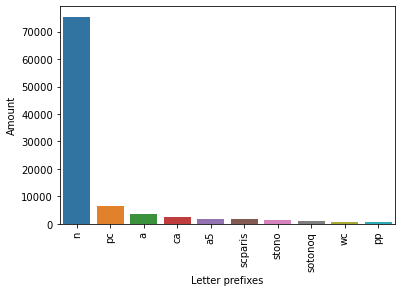

In [27]:
frequency_table = pd.DataFrame(train['Letter prefixes'].value_counts())
print(frequency_table)

# bar chart
sns.barplot(x=frequency_table.index[0:10], y=frequency_table['Letter prefixes'][0:10])
plt.xlabel("Letter prefixes")
plt.ylabel("Amount")
plt.xticks(rotation = 90)

<AxesSubplot:ylabel='Letter prefixes'>

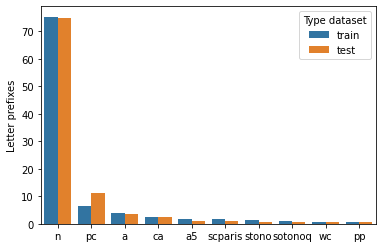

In [28]:
# Comparing distribution of the variable `Letter prefixes` in the train and test datasets

frequency_table['Type dataset'] = 'train'
test_table = pd.DataFrame(test['Letter prefixes'].value_counts())
test_table['Type dataset'] = 'test'
total_table = pd.concat([frequency_table[0:10], test_table[0:10]], axis=0)
total_table
plt.xlabel('')
plt.ylabel('')

sns.barplot(x=total_table.index, y=total_table['Letter prefixes'] / 1000, zorder=2, hue=total_table['Type dataset'])

## Uni variate analysis of variables `Deck` and `Cabin`
Almost 70% of the values of the both variables are missing. Values of the variable `Deck` are `A`, `B`, `C`, `D`, `E`, `F`, `G`, `T` and `N` (where `N` us artificial value meaning `NaN`). Appearing of each value of the `Deck` (except the value `C`) in the `test` and `train` datasets is balanced. There is quite a distinct imbalance between values `C` in the `test` and `train` datasets.

    Deck
N  67866
C  11825
B   7439
A   6307
D   3637
E   1749
F    663
G    482
T     32


Text(0, 0.5, 'Amount')

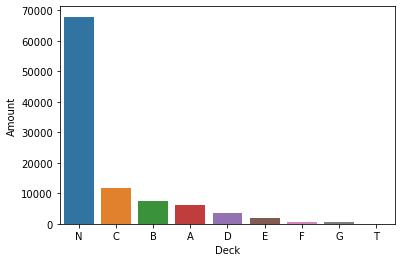

In [29]:
frequency_table = pd.DataFrame(train['Deck'].value_counts())
print(frequency_table)

# bar chart
sns.barplot(x=frequency_table.index, y=frequency_table['Deck'])
plt.xlabel("Deck")
plt.ylabel("Amount")

<AxesSubplot:ylabel='Deck'>

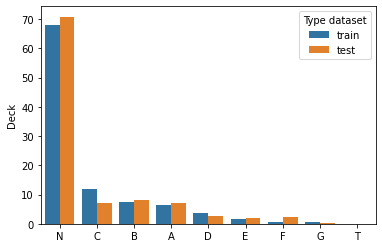

In [30]:
# Comparing distribution of the variable `Deck` in the train and test datasets

frequency_table['Type dataset'] = 'train'
test_table = pd.DataFrame(test['Deck'].value_counts())
test_table['Type dataset'] = 'test'
total_table = pd.concat([frequency_table, test_table], axis=0)
total_table
plt.xlabel('')
plt.ylabel('')

sns.barplot(x=total_table.index, y=total_table['Deck'] / 1000, zorder=2, hue=total_table['Type dataset'])

## Filling Missing Values
 - In the variable `Cabin` we replace `NaN` with `0`
 - In the variables `Age` and `Fare` we replace `NaN` mean values over ticket classes
 - In the variable `Embarked` we replace `NaN` by new category 'X'

In [31]:
print(train.info(), '\n')
print(test.info(), '\n')

train['Cabin'] = train['Cabin'].fillna(0)
test['Cabin'] = test['Cabin'].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PassengerId      100000 non-null  int64  
 1   Survived         100000 non-null  int64  
 2   Pclass           100000 non-null  int64  
 3   Name             100000 non-null  object 
 4   Sex              100000 non-null  object 
 5   Age              96708 non-null   float64
 6   SibSp            100000 non-null  int64  
 7   Parch            100000 non-null  int64  
 8   Ticket           95377 non-null   object 
 9   Fare             99866 non-null   float64
 10  Cabin            32134 non-null   object 
 11  Embarked         99750 non-null   object 
 12  First name       100000 non-null  object 
 13  Second name      100000 non-null  object 
 14  Letter prefixes  100000 non-null  object 
 15  Deck             100000 non-null  object 
dtypes: float64(2), int64(5), object(9)
memo

<AxesSubplot:title={'center':'Age'}, xlabel='[Pclass]'>

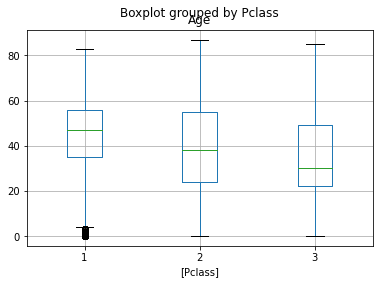

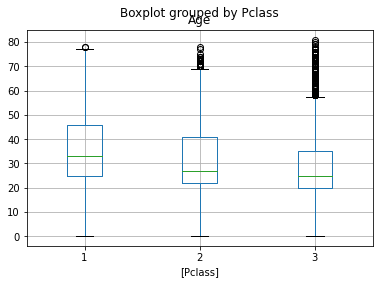

In [32]:
# We can see that expected older people had higher ticket class
train[['Age', 'Pclass']].boxplot(by = 'Pclass')
test[['Age', 'Pclass']].boxplot(by = 'Pclass')

In [33]:
# In the variable `Age` we replace `NaN` mean values over ticket classes
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))
test['Age'] = test['Age'].fillna(test.groupby('Pclass')['Age'].transform('mean'))

In [34]:
# Empty entries of the column `Ticket` we fill by 'NaN'
# In the column 'Ticket' we replace 'NaN' with mean

train['Ticket'] = train['Ticket'].apply(lambda e : e if len(str(e)) > 0 else 'NaN')
train['Ticket'] = train['Ticket'].astype(float)

test['Ticket'] = test['Ticket'].apply(lambda e : e if len(str(e)) > 0 else 'NaN')
test['Ticket'] = test['Ticket'].astype(float)

test['Ticket'] = test['Ticket'].fillna(test['Ticket'].mean()).astype(int)
train['Ticket'] = train['Ticket'].fillna(train['Ticket'].mean()).astype(int)
test['Ticket']

0          24745
1          13264
2          25990
3         314011
4          26203
          ...   
99995       7686
99996      13004
99997    4383317
99998      26988
99999      41824
Name: Ticket, Length: 100000, dtype: int32

In [35]:
# In the variable `Fare` we replace `NaN` mean values over ticket classes
train['Fare'] = train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('mean'))
test['Fare'] = test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('mean'))
test['Fare']

0         63.01
1          5.81
2         38.91
3         12.93
4         26.89
          ...  
99995     10.12
99996     68.31
99997     10.87
99998     29.68
99999    195.41
Name: Fare, Length: 100000, dtype: float64

In [36]:
test['Embarked'] = test['Embarked'].fillna('X')
train['Embarked'] = train['Embarked'].fillna('X')

In [37]:
print(train.info(), '\n')
print(test.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PassengerId      100000 non-null  int64  
 1   Survived         100000 non-null  int64  
 2   Pclass           100000 non-null  int64  
 3   Name             100000 non-null  object 
 4   Sex              100000 non-null  object 
 5   Age              100000 non-null  float64
 6   SibSp            100000 non-null  int64  
 7   Parch            100000 non-null  int64  
 8   Ticket           100000 non-null  int32  
 9   Fare             100000 non-null  float64
 10  Cabin            100000 non-null  object 
 11  Embarked         100000 non-null  object 
 12  First name       100000 non-null  object 
 13  Second name      100000 non-null  object 
 14  Letter prefixes  100000 non-null  object 
 15  Deck             100000 non-null  object 
dtypes: float64(2), int32(1), int64(5), obje

In [46]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First name,Second name,Letter prefixes,Deck
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,0,S,Daniel,Holliday,n,N
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,0,S,Lorraine,Nguyen,n,N
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,15315,C,Heather,Harris,n,B
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,0,S,Eric,Larsen,n,N
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,22515,C,Sarah,Cleary,n,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,3,"Cash, Cheryle",female,27.0,0,0,7686,10.12,0,Q,Cheryle,Cash,n,N
99996,199996,1,"Brown, Howard",male,59.0,1,0,13004,68.31,0,S,Howard,Brown,n,N
99997,199997,3,"Lightfoot, Cameron",male,47.0,0,0,4383317,10.87,0,S,Cameron,Lightfoot,n,N
99998,199998,1,"Jacobsen, Margaret",female,49.0,1,2,26988,29.68,20828,C,Margaret,Jacobsen,pc,B


## Survival rate
We want to analysis `Survival rate` depending on values of features. We calculate the survival rate by dividing the survived passengers with its own category observations.

As we can see that
 - 58%, 52% and 25% of passengers with the 1st class tickets, the 2nd class tickets and the 3rd class tickets respectively were survived
 - 70% and 20% of females and males respectively were survived
 - chances for surviving of passengers which were in deck `F` and `G` is higher than for passengers on other decks
 - passengers with `Age` 20-40 have a lower chance to survive and passengers `Age` 40-60 have a higher chances to survive
 - passengers with lower `Fare` have a lower chance to survive
 - passengers with few relatives have more chances to survive
 - passengers embarked from `Cherbourg` had more chanced to survive

In [38]:
train['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

In [39]:
# Calculation `Survival rate` over ticket class `Pclass`
train['Double'] = train['Survived']
pivot_table = train.pivot_table(values = ['Survived'], index = ['Pclass'], columns = ['Double'], aggfunc='count')

print(pivot_table)

p = pivot_table['Survived']
s1 = pd.Series([p[1][1], p[1][2], p[1][3]])
s2 = pd.Series([p[0][1], p[0][2], p[0][3]])
df = pd.DataFrame(columns = ['Survived', 'Not Survived', 'Total'])
df['Survived'] = s1
df['Not Survived'] = s2
df['Total'] = df['Survived'] + df['Not Survived']
df['Percentage'] = df['Survived']/df['Total']*100
df.index = df.index + 1
df

       Survived       
Double        0      1
Pclass                
1         12739  17576
2         13622  15057
3         30865  10141


,Survived,Not Survived,Total,Percentage
1,17576,12739,30315,57.977899
2,15057,13622,28679,52.501831
3,10141,30865,41006,24.730527


In [40]:
# Calculation `Survival rate` over `Sex`
pivot_table = train.pivot_table(values = ['Survived'], index = ['Sex'], columns = ['Double'], aggfunc='count')

print(pivot_table)
p = pivot_table['Survived']
s1 = pd.Series([p[0][0], p[0][1]])
s2 = pd.Series([p[1][0], p[1][1]])
df = pd.DataFrame(columns = ['Survived', 'Not Survived', 'Total'])
df['Survived'] = s2
df['Not Survived'] = s1
df['Total'] = df['Survived'] + df['Not Survived']
df['Percentage'] = df['Survived']/df['Total']*100
df.index = ['female', 'male']
df

       Survived       
Double        0      1
Sex                   
female    12660  31226
male      44566  11548


,Survived,Not Survived,Total,Percentage
female,31226,12660,43886,71.152532
male,11548,44566,56114,20.579535


In [41]:
# Calculation `Survival rate` over `Deck`
pivot_table = train.pivot_table(values = ['Survived'], index = ['Deck'], columns = ['Double'], aggfunc='count')

print(pivot_table)
p = pivot_table['Survived']
s1 = pd.Series([p[0][0], p[0][1], p[0][2], p[0][3], p[0][4], p[0][5], p[0][6], p[0][7], p[0][8]])
s2 = pd.Series([p[1][0], p[1][1], p[1][2], p[1][3], p[1][4], p[1][5], p[1][6], p[1][7], p[1][8]])
df = pd.DataFrame(columns = ['Survived', 'Not Survived', 'Total'])
df['Survived'] = s2
df['Not Survived'] = s1
df['Total'] = df['Survived'] + df['Not Survived']
df['Percentage'] = df['Survived']/df['Total']*100
df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T']
print(df)

       Survived       
Double        0      1
Deck                  
A          4575   1732
B          2751   4688
C          3403   8422
D           974   2663
E           669   1080
F           108    555
G            79    403
N         44649  23217
T            18     14
   Survived  Not Survived  Total  Percentage
A      1732          4575   6307   27.461551
B      4688          2751   7439   63.019223
C      8422          3403  11825   71.221987
D      2663           974   3637   73.219687
E      1080           669   1749   61.749571
F       555           108    663   83.710407
G       403            79    482   83.609959
N     23217         44649  67866   34.210061
T        14            18     32   43.750000


Text(0, 0.5, '')

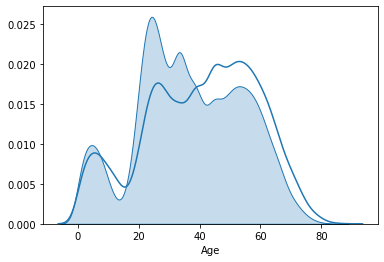

In [42]:
# Assessing `Survival rate` over `Age`

distr = sns.kdeplot(x=train[train['Survived'] == 1]['Age'], zorder=2, shade=False)
distr = sns.kdeplot(x=train[train['Survived'] == 0]['Age'], zorder=2, shade=True)
distr.set_xlabel('Age')
distr.set_ylabel('')

Text(0, 0.5, '')

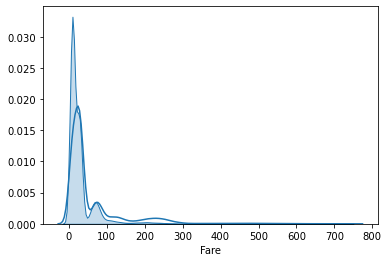

In [43]:
# Assessing `Survival rate` over `Fare`

distr = sns.kdeplot(x=train[train['Survived'] == 1]['Fare'], zorder=2, shade=False)
distr = sns.kdeplot(x=train[train['Survived'] == 0]['Fare'], zorder=2, shade=True)
distr.set_xlabel('Fare')
distr.set_ylabel('')

In [44]:
# Calculation `Survival rate` over `SibSp`
pivot_table = train.pivot_table(values = ['Survived'], index = ['SibSp'], columns = ['Double'], aggfunc='count')

print(pivot_table)
p = pivot_table['Survived']
s1 = pd.Series([p[0][0], p[0][1], p[0][2], p[0][3], p[0][4], p[0][5], p[0][8]])
s2 = pd.Series([p[1][0], p[1][1], p[1][2], p[1][3], p[1][4], p[1][5], p[1][8]])
df = pd.DataFrame(columns = ['Survived', 'Not Survived', 'Total'])
df['Survived'] = s2
df['Not Survived'] = s1
df['Total'] = df['Survived'] + df['Not Survived']
df['Percentage'] = df['Survived']/df['Total']*100
df.index = ['0', '1', '2', '3', '4', '5', '8']
print(df)

       Survived       
Double        0      1
SibSp                 
0         42017  31291
1         11188   8570
2          2022   1681
3           981    654
4           729    439
5           107     25
8           182    114
   Survived  Not Survived  Total  Percentage
0     31291         42017  73308   42.684291
1      8570         11188  19758   43.374836
2      1681          2022   3703   45.395625
3       654           981   1635   40.000000
4       439           729   1168   37.585616
5        25           107    132   18.939394
8       114           182    296   38.513514


In [45]:
# Calculation `Survival rate` over `Embarked`
pivot_table = train.pivot_table(values = ['Survived'], index = ['Embarked'], columns = ['Double'], aggfunc='count')

print(pivot_table)
p = pivot_table['Survived']
s1 = pd.Series([p[0][0], p[0][1], p[0][2], p[0][3]])
s2 = pd.Series([p[1][0], p[1][1], p[1][2], p[1][3]])
df = pd.DataFrame(columns = ['Survived', 'Not Survived', 'Total'])
df['Survived'] = s2
df['Not Survived'] = s1
df['Total'] = df['Survived'] + df['Not Survived']
df['Percentage'] = df['Survived']/df['Total']*100
df.index = ['C', 'Q', 'S', 'X']
print(df)

         Survived       
Double          0      1
Embarked                
C            5518  16669
Q            2186   3238
S           49394  22745
X             128    122
   Survived  Not Survived  Total  Percentage
C     16669          5518  22187   75.129580
Q      3238          2186   5424   59.697640
S     22745         49394  72139   31.529409
X       122           128    250   48.800000


# Summary

We conclude that
 - continuously variables are `Age`, `Fare`, `Ticket` (numerical parts of ticket numbers)
 - discrete variable are `Pclass`, `Name`, `Sex`, `SibSp`, `Parch`, `Letter prefixes` (letter parts of ticket numbers)
 - there are duplicated values of the variable `Ticket`, `Cabin` (in the both `train` and `test` datasets)
 - there are empty entries in the column `Ticket`
 - too much missing values in the column `Cabin`

We transform data as follows:
 - we extract first names and last names from values of variable `Name` into new features `First name` and `Second name`
 - letter parts of `Ticket` numbers were extracted into new feature `Letter prefixes` and normalize, removed from `Ticket`
 - deck numbers from values of `Cabin` were extracted into new feature `Deck` and removed from `Cabin`
 - in the variable `Cabin` we replace `NaN` with new category `0`
 - in the variables `Age` and `Fare` we replace `NaN` mean values over ticket classes `Pclass`
 - in the variable `Embarked` we replace `NaN` by new category `X`
 - empty entries of the column `Ticket` we fill by `NaN`
 - in the column `Ticket` we replace `NaN` with mean value

On the ship Titanic
 - males were more than females
 - passengers with the 3rd class ticket were more than ones with the 1st class ticket (the 2nd class ticket)
 - the number of passengers with the 1st class ticket and the 2nd class ticket almost coincided
 - approximately 70% of the total passengers on the ship without siblings/spouses
 - approximately 70% of the total passengers on the ship without parents/children
 - approximately 25% of the total tickets has a letter prefix in the number
 - most of the passengers are embarked from Southampton
 - top five first names of passengers: James, John, Robert, Michael, William
 - top five last names of passengers: Smith, Johnson, Williams, Jones, Brown
 - Survived passengers were less than not survived
 - 58%, 52% and 25% of passengers with the 1st class tickets, the 2nd class tickets and the 3rd class tickets respectively were survived.
 - chances for surviving is higher for passengers with the 1st and 2nd class tickets than for passengers with the 3rd class tickets
 - 70% and 20% of females and males respectively were survived
 - chances for surviving of females is higher than for males
 - chances for surviving of passengers which were on decks `F` and `G` is higher than for passengers on other decks
 - passengers with ages 20-40 have a lower chance to survive and passengers ages 40-60 have a higher chances to survive
 - passengers with lower fare have a lower chance to survive
 - passengers with few relatives have more chances to survive
 - passengers embarked from `Cherbourg` had more chanced to survive